In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score
from scipy.spatial import distance

label_path = '../../data/S500/symsim_labels_20000genes_500cells_simple.csv'
dropout_levels = [round(i / 10, 1) for i in range(1, 10)]

#load constant labels
labels = pd.read_csv(label_path, index_col=0)
labels.index = labels.index.astype(int)


all_results = {}

for dropout in dropout_levels:
    print(f"\n=== Dropout Level: {dropout} ===")

    data_path = f"../../data/S500/noise_dropout_{dropout}.csv"
    counts = pd.read_csv(data_path, index_col=0)
    if counts.shape[0] > counts.shape[1]:
        counts = counts.T

    adata = sc.AnnData(counts)
    adata.obs.index = adata.obs.index.str.lstrip('X').astype(int)
    adata.obs['cell_class'] = labels.reindex(adata.obs.index)['x'].astype(str)

    metrics = {
        'euclidean': {},
        'manhattan': {},
        'minkowski_0.5': {}
    }

    for metric in metrics:
        trustworthiness_scores = []
        silhouette_scores = []

        for i in range(10):
            print(f"Metric: {metric}, Run: {i+1}/10")

            if metric == 'minkowski_0.5':
                sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric='minkowski', metric_kwds={'p': 0.5})
            else:
                sc.pp.neighbors(adata, n_neighbors=15, use_rep='X', metric=metric)

            sc.tl.umap(adata, random_state=None)

            # Trustworthiness
            tw = trustworthiness(adata.X, adata.obsm['X_umap'], n_neighbors=15, metric='euclidean')
            trustworthiness_scores.append(tw)

            # Silhouette Score
            sil_score = silhouette_score(adata.obsm['X_umap'], adata.obs['cell_class'], metric='euclidean')
            silhouette_scores.append(sil_score)

        metrics[metric] = {
            'trustworthiness': trustworthiness_scores,
            'silhouette': silhouette_scores,
            'trustworthiness_mean': np.mean(trustworthiness_scores),
            'trustworthiness_min': np.min(trustworthiness_scores),
            'trustworthiness_max': np.max(trustworthiness_scores),
            'silhouette_mean': np.mean(silhouette_scores),
            'silhouette_min': np.min(silhouette_scores),
            'silhouette_max': np.max(silhouette_scores)
        }

    all_results[f"dropout_{dropout}"] = metrics


=== Dropout Level: 0.1 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.2 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.3 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.4 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.5 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.6 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.7 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.8 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(



=== Dropout Level: 0.9 ===
Metric: euclidean, Run: 1/10
Metric: euclidean, Run: 2/10
Metric: euclidean, Run: 3/10
Metric: euclidean, Run: 4/10
Metric: euclidean, Run: 5/10
Metric: euclidean, Run: 6/10
Metric: euclidean, Run: 7/10
Metric: euclidean, Run: 8/10
Metric: euclidean, Run: 9/10
Metric: euclidean, Run: 10/10
Metric: manhattan, Run: 1/10
Metric: manhattan, Run: 2/10
Metric: manhattan, Run: 3/10
Metric: manhattan, Run: 4/10
Metric: manhattan, Run: 5/10
Metric: manhattan, Run: 6/10
Metric: manhattan, Run: 7/10
Metric: manhattan, Run: 8/10
Metric: manhattan, Run: 9/10
Metric: manhattan, Run: 10/10
Metric: minkowski_0.5, Run: 1/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 2/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 3/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 4/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 5/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 6/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 7/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 8/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 9/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Metric: minkowski_0.5, Run: 10/10


c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_graph.py:434: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  self._fit(X)
c:\Users\sofus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:653: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


In [3]:
print(all_results)

{'dropout_0.1': {'euclidean': {'trustworthiness': [0.9589856044723969, 0.9592807826694619, 0.9589252271139064, 0.9592603773584906, 0.9581640810621943, 0.9589126484975542, 0.9584396925227114, 0.9588181691125087, 0.9588181691125087, 0.9583077568134172], 'silhouette': [0.48367270046397953, 0.7121573216141975, 0.632226743471809, 0.6848309286221006, 0.6269686691541116, 0.6290139823462164, 0.6425836545845811, 0.6050095387582302, 0.5673729533180484, 0.6059298405053235], 'trustworthiness_mean': 0.9587912508735149, 'trustworthiness_min': 0.9581640810621943, 'trustworthiness_max': 0.9592807826694619, 'silhouette_mean': 0.6189766332838598, 'silhouette_min': 0.48367270046397953, 'silhouette_max': 0.7121573216141975}, 'manhattan': {'trustworthiness': [0.9544497554157931, 0.9536955974842767, 0.9548737945492662, 0.9536575821104123, 0.9535303983228511, 0.9538778476589798, 0.9537098532494759, 0.953524248777079, 0.9533691125087351, 0.9542208245981831], 'silhouette': [0.6773429130749276, 0.84045327350470

In [ ]:
import pickle

# Save the all_results dictionary to a file
with open("all_results_S500.pkl", "wb") as f:
    pickle.dump(all_results, f)

print("Saved all_results to all_results_S500.pkl")

Saved all_results to all_results.pkl


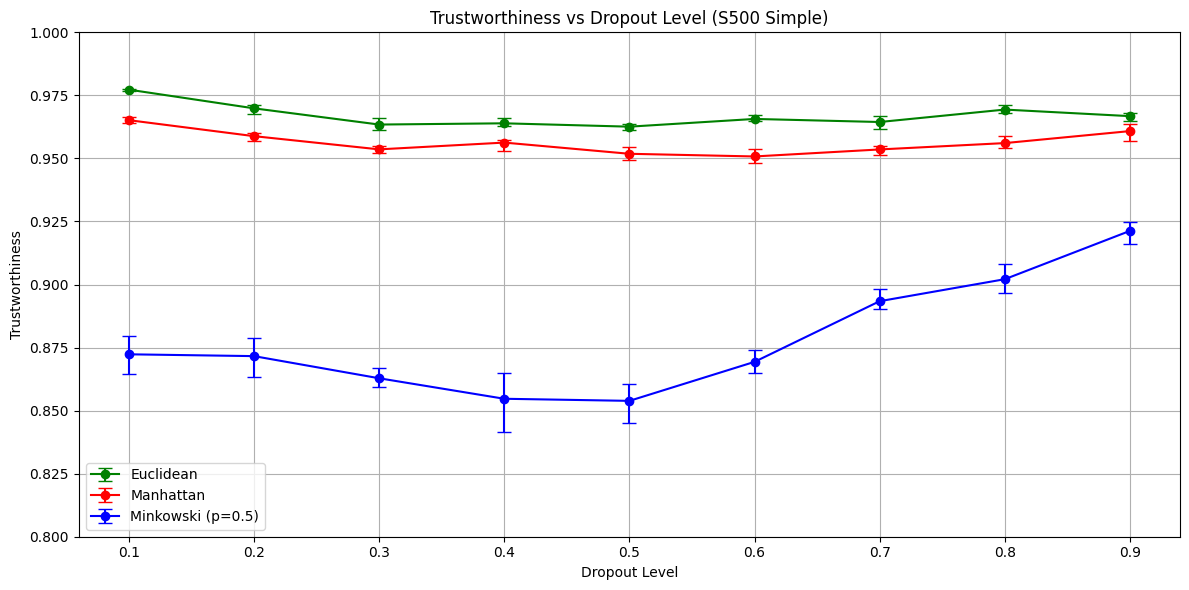

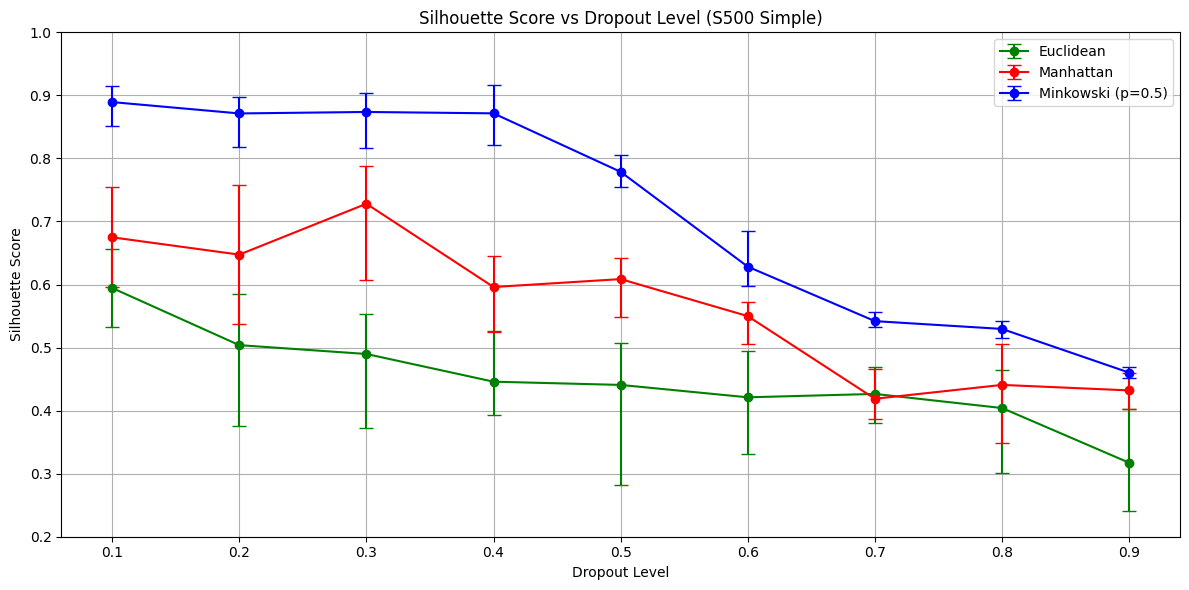

In [4]:
import numpy as np
import matplotlib.pyplot as plt


dropout_levels = [round(i, 1) for i in np.arange(0.1, 1.0, 0.1)]
metrics_names = {
    'euclidean': 'Euclidean',
    'manhattan': 'Manhattan',
    'minkowski_0.5': 'Minkowski (p=0.5)'
}
colors = {
    'euclidean': 'green',
    'manhattan': 'red',
    'minkowski_0.5': 'blue'
}

if all_results:
    # Trustworthiness Plot
    plt.figure(figsize=(12, 6))
    for metric in metrics_names:
        trust_means = []
        trust_mins = []
        trust_maxs = []
        for d in dropout_levels:
            entry = all_results[f"dropout_{d}"][metric]
            trust_means.append(entry['trustworthiness_mean'])
            trust_mins.append(entry['trustworthiness_min'])
            trust_maxs.append(entry['trustworthiness_max'])
        trust_err_low = np.array(trust_means) - np.array(trust_mins)
        trust_err_high = np.array(trust_maxs) - np.array(trust_means)
        plt.errorbar(dropout_levels, trust_means, yerr=[trust_err_low, trust_err_high], label=metrics_names[metric], fmt='-o', capsize=5, color=colors[metric])
    plt.title('Trustworthiness vs Dropout Level (S500 Simple)')
    plt.xlabel('Dropout Level')
    plt.ylabel('Trustworthiness')
    plt.ylim(0.8, 1.0)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Silhouette Plot
    plt.figure(figsize=(12, 6))
    for metric in metrics_names:
        sil_means = []
        sil_mins = []
        sil_maxs = []
        for d in dropout_levels:
            entry = all_results[f"dropout_{d}"][metric]
            sil_means.append(entry['silhouette_mean'])
            sil_mins.append(entry['silhouette_min'])
            sil_maxs.append(entry['silhouette_max'])
        sil_err_low = np.array(sil_means) - np.array(sil_mins)
        sil_err_high = np.array(sil_maxs) - np.array(sil_means)
        plt.errorbar(dropout_levels, sil_means, yerr=[sil_err_low, sil_err_high], label=metrics_names[metric], fmt='-o', capsize=5, color=colors[metric])
    plt.title('Silhouette Score vs Dropout Level (S500 Simple)')
    plt.xlabel('Dropout Level')
    plt.ylabel('Silhouette Score')
    plt.ylim(0.2, 1.0)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("`all_results` not found. Please re-run the metric calculations or reload the saved data.")
